In [1]:
import openmc

In [2]:
from openmc_activator import OpenMCActivator
import pickle
data = pickle.load(open('./irradiation_setup.pkl', 'rb'))
locals().update(data)


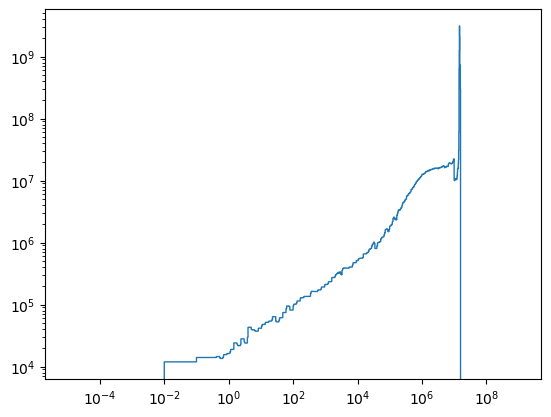

In [3]:
import matplotlib.pyplot as plt
plt.stairs(values=fluxes, edges=ebins)
plt.xscale('log')
plt.yscale('log')

In [40]:

import numpy as np
mass_dict = {'Ag107': 0.5138, 'Ag109': 0.4862}
obj = OpenMCActivator(ebins, fluxes)
#obj.activate(mass_dict, flux_mag_list[0], [days_list[0]],
metric_dict = obj.activate(mass_dict, flux_mag_list[0], [days_list[0]], 
                chain_file_path='/home/4ib/git/fermi/fermi/data/openmc/chain_endf_b8.0.xml',
                metric_list=['mass', 'atom', 'activity', 'decay_heat'])
print(metric_dict)


['Mo97', 'Cd115_m1', 'Sb121', 'Xe133', 'Pd105', 'Ti49', 'Cr54', 'Pa229', 'Pb207', 'Tl205', 'Bk248', 'W183', 'I131', 'Pa232', 'Nb93', 'U235', 'Kr82', 'Ho165', 'Pr143', 'Xe134', 'Hg204', 'Ni61', 'Ta181', 'Y90', 'Sm151', 'Ni60', 'Co58', 'Ge70', 'Se76', 'Ti48', 'Pm148', 'Am243', 'Ru96', 'Gd153', 'Nd150', 'Er170', 'Pu243', 'Pu240', 'Bk249', 'Ce139', 'Zn68', 'Pd108', 'Kr86', 'Tm168', 'Bk250', 'U231', 'Tm170', 'Te128', 'Cu65', 'Pb206', 'Zr91', 'I129', 'Mo96', 'Dy160', 'Mn55', 'Hf178', 'U236', 'U230', 'Zn64', 'Ru100', 'Ca44', 'Xe131', 'Ar40', 'Sr89', 'Sm144', 'V51', 'Ge72', 'W184', 'Si30', 'Te126', 'Nd145', 'Ge73', 'Sn119', 'Kr78', 'Nd143', 'Se74', 'Mo100', 'U233', 'Pu237', 'Rb86', 'Pd110', 'Th227', 'Ag110_m1', 'Se77', 'Tb159', 'Zr95', 'Mo94', 'Be7', 'Ag107', 'Li6', 'Zr92', 'H2', 'Te130', 'Gd160', 'Pr141', 'Tc99', 'Cr50', 'Ce140', 'Zn67', 'Ru98', 'Xe136', 'Ba130', 'U234', 'O16', 'S36', 'Sm149', 'Ce136', 'Hf177', 'Rb87', 'Te123', 'Sn126', 'Cm248', 'Y91', 'Eu156', 'Sr88', 'Ca42', 'Er168', 'Ge74'

/home/4ib/anaconda3/envs/openmc/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


[openmc.deplete] t=0.0 s, dt=300.0 s, source=11160000000.0
[openmc.deplete] t=300.0 (final operator evaluation)
{'mass_grams': {'Ac206': array([0., 0.]), 'Ac206_m1': array([0., 0.]), 'Ac207': array([0., 0.]), 'Ac208': array([0., 0.]), 'Ac208_m1': array([0., 0.]), 'Ac209': array([0., 0.]), 'Ac210': array([0., 0.]), 'Ac211': array([0., 0.]), 'Ac212': array([0., 0.]), 'Ac213': array([0., 0.]), 'Ac214': array([0., 0.]), 'Ac215': array([0., 0.]), 'Ac216': array([0., 0.]), 'Ac216_m1': array([0., 0.]), 'Ac217': array([0., 0.]), 'Ac218': array([0., 0.]), 'Ac219': array([0., 0.]), 'Ac220': array([0., 0.]), 'Ac221': array([0., 0.]), 'Ac222': array([0., 0.]), 'Ac222_m1': array([0., 0.]), 'Ac223': array([ 0.00000000e+00, -6.21088229e+12]), 'Ac224': array([ 0.00000000e+00, -1.67432413e+11]), 'Ac225': array([ 3.73659862e-19, -1.82544004e-07]), 'Ac226': array([ 3.75325164e-19, -8.23032777e-09]), 'Ac227': array([ 3.76988449e-19, -6.11447731e-10]), 'Ac228': array([       0.        , -1417608.12176318])

In [41]:
import pickle
d = pickle.load(open('./collapsed_xs.pkl', 'rb'))
d['isos']
d['xs_arr'][15, 84]

2.0912639164127067

In [42]:
atoms = metric_dict['atom_']
print(sum({q:v[0] for q,v in atoms.items()}.values()))
print(atoms['Ag107'])
ea = {q:v[-1] for q, v in atoms.items()}
ea['Ag108']

5.582875980369588e+21
[2.89432045e+21 6.82826465e+20]


2.3068456478684673e+36

In [43]:
ea = {q:v[0] for q, v in atoms.items()}
print(sum(ea.values()))

5.582875980369588e+21


In [44]:
atoms = metric_dict['atom_']
atoms['Ag108']

array([0.00000000e+00, 2.30684565e+36])

In [48]:
dhw = metric_dict['mass_grams']
end = {k:v[-1] for k,v in dhw.items()}
print(sum(end.values())) # this is grams

8.43214109853382e+17


In [49]:
end = {k:v[0] for k,v in dhw.items()}
print(sum(end.values())) # this is grams

1.0


In [46]:
dhw['Ag108']

array([0.00000000e+00, 4.13345323e+14])

In [47]:
dhw = metric_dict['decay_heat_watts']
end = {k:v[-1] for k,v in dhw.items()}
print(sum(end.values())) # this is W/g
# FISPACT says 3.05901E-06

3.231860346311284e+25


In [12]:
4.116425181377357e-12


4.116425181377357e-12